In [ ]:
import pandas as pd

# Clustering

In this notebook we will attempt to split our dataset into clusters to create basis on which to build classification models on next stage of this research. This specific case is dedicated to clustering data **based only on features, not target metric**. We firstly do not include any of the target metrics to check if split by features' differences is good itself.

We will use the following clustering algorithms:

* k-means++
* MeanShift
* DBSCAN

The default number of clusters we want to get is 3, which stands for employees with lower productivity, average productivity and higher productivity.

Again, to perform clusterization we will be using dataset of 5 quarters of 700+ employees' physical worklog.

In [ ]:
df = pd.read_csv('dataset_quarts.csv')

In [ ]:
df = df.set_index('author')

In [ ]:
df

,period1,period2,period3,adf_c,adf_ct,adf_ctt,pp_c,pp_ct,kpss_c,kpss_ct,...,daily1,daily2,weekly0,weekly1,weekly2,icr,suptr,ar,isd,target
author,,,,,,,,,,,,,,,,,,,,,
author314_2023-07-01_2023-09-30,11,27,29,0,0,0,0,0,0,0,...,1,1,1,1,1,0.691346,1.000000,1.000000,0.028118,0.679866
author363_2023-07-01_2023-09-30,28,10,19,0,0,0,0,0,0,0,...,1,1,1,1,1,0.936058,0.944231,0.935705,0.061224,0.719305
author286_2023-07-01_2023-09-30,22,13,30,1,1,1,0,0,0,0,...,1,1,1,1,1,0.893269,1.000000,0.971154,0.014966,0.719847
author912_2023-07-01_2023-09-30,31,30,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0.870673,0.987019,0.999038,0.033107,0.722459
author15_2023-07-01_2023-09-30,1,2,28,1,1,1,0,0,0,1,...,0,0,1,1,1,0.882692,1.000000,1.000000,0.010431,0.723281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
author288_2024-07-01_2024-09-30,9,29,21,0,0,0,0,0,0,0,...,1,1,1,1,1,0.000000,1.000000,0.772727,0.500000,0.568182
author255_2024-07-01_2024-09-30,17,21,28,0,0,0,0,0,0,0,...,1,1,1,1,1,0.000000,1.000000,1.000000,0.250000,0.562500
author898_2024-07-01_2024-09-30,1,14,21,1,1,1,0,0,1,0,...,1,1,1,1,1,0.924242,1.000000,1.000000,1.000000,0.981061


In [ ]:
features = df.drop(columns=['icr', 'suptr', 'isd', 'ar', 'target'], axis=1)

## **1. k-means++**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")

In [ ]:
kmeans.fit(features)

KMeans(n_clusters=3, random_state=42)

In [ ]:
len(kmeans.labels_)

4977

In [ ]:
df_with_kmeans = df.copy()
df_with_kmeans['kmeans'] = kmeans.labels_

In [ ]:
df_with_kmeans[df_with_kmeans['kmeans'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,3590.0,18.142340,9.485163,1.000000,12.000000,20.000000,26.000000,33.000000
period2,3590.0,18.577716,9.179244,1.000000,13.000000,20.000000,26.000000,33.000000
period3,3590.0,18.769916,9.039740,1.000000,12.000000,20.000000,27.000000,33.000000
adf_c,3590.0,0.135933,0.342765,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,3590.0,0.153482,0.360502,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,3590.0,0.168245,0.374136,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,3590.0,0.010306,0.101010,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,3590.0,0.011421,0.106270,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,3590.0,0.101950,0.302625,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,3590.0,0.141226,0.348303,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df_with_kmeans[df_with_kmeans['kmeans'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,994.0,18.551308,8.588845,1.000000,12.000000,19.000000,26.000000,32.000000
period2,994.0,18.450704,8.185666,1.000000,12.000000,18.500000,26.000000,33.000000
period3,994.0,18.584507,8.590107,1.000000,12.000000,19.000000,26.000000,33.000000
adf_c,994.0,0.028169,0.165539,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,994.0,0.040241,0.196624,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,994.0,0.052314,0.222771,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,994.0,0.003018,0.054882,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,994.0,0.003018,0.054882,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,994.0,0.002012,0.044834,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,994.0,0.004024,0.063340,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df_with_kmeans[df_with_kmeans['kmeans'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,393.0,16.447837,9.673652,2.000000,7.000000,17.000000,26.000000,32.000000
period2,393.0,15.989822,9.167094,3.000000,6.000000,16.000000,24.000000,32.000000
period3,393.0,16.753181,8.774828,1.000000,9.000000,16.000000,25.000000,33.000000
adf_c,393.0,0.010178,0.100500,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,393.0,0.012723,0.112218,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,393.0,0.012723,0.112218,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,393.0,0.002545,0.050443,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,393.0,0.002545,0.050443,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,393.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kpss_ct,393.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


As a result of k-means++ clustering we get 3 clusters (as stated in model initialization) of sizes 3590 (cluster 1), 994 (cluster 2) and 393 (cluster 3).

We can clearly see that clusterization was performed without any impact of target metric, because in each cluster there are objects with wide range of target values from lower to higher (see min and max columns on target's describe).

As to features, we can assume that cluster 1 is supposed to be "higher" productive employees, as it clearly has lesser max and variance mean values and higher mean of being stationary. Cluster 3, on the other hand, is supposed to be "lower" productive employees with bigger max and variance and lesser mean of being stationary. Also the mean target value from cluster 1 to cluster 3 is decreasing.

The result may seem pretty good, but there are two major problems:

* Mean period values show no logical connection on cluster differences. Period features had rather big importance in regression models, so to keep strong differences between clusters based on periods is sufficient.
* Cluster 1 with employees of higher productivity is almost 3 times bigger than other two combined, which is bad in terms of common sense.

Next, we want to build a scatter plot to see if there are any obvious pairwise dependencies between features with respect to clusters.

The most obvious is a split based on max and variance: higher get to cluster 3, lesser get to cluster 1.

Output of cell below is cleared on purpose of less memory, but readers can rerun it and get all the scatters themselves.

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        fig, ax = plt.subplots()

        cluster0 = df_with_kmeans[df_with_kmeans['kmeans'] == 0]
        x, y = cluster0[df.columns[i]], cluster0[df.columns[j]]
        ax.scatter(x, y, c='green', label='cluster 1', alpha=0.3, edgecolors='none')

        cluster1 = df_with_kmeans[df_with_kmeans['kmeans'] == 1]
        x, y = cluster1[df.columns[i]], cluster1[df.columns[j]]
        ax.scatter(x, y, c='blue', label='cluster 2', alpha=0.3, edgecolors='none')

        cluster2 = df_with_kmeans[df_with_kmeans['kmeans'] == 2]
        x, y = cluster2[df.columns[i]], cluster2[df.columns[j]]
        ax.scatter(x, y, c='red', label='cluster 3', alpha=0.3, edgecolors='none')

        ax.legend()
        ax.grid(True)
        ax.set_ylabel(df.columns[j])
        ax.set_xlabel(df.columns[i])

        plt.show()

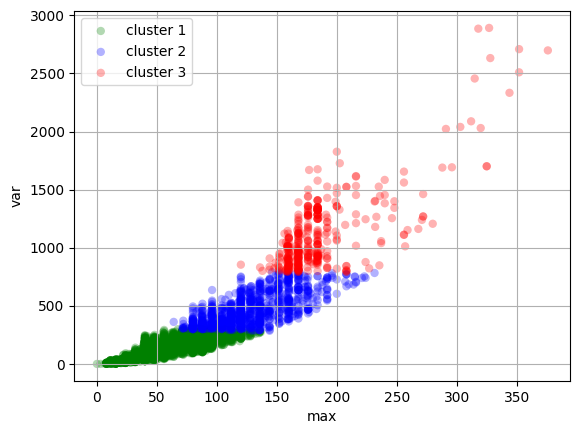

## **2. MeanShift**

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
meanshift = MeanShift()

In [ ]:
meanshift.fit(features)

MeanShift()

In [ ]:
df_with_meanshift = df.copy()
df_with_meanshift['meanshift'] = meanshift.labels_

In [ ]:
df_with_meanshift.meanshift.value_counts()

,count
meanshift,
0,4403
5,354
1,170
9,21
8,15
2,4
3,3
7,2
4,2


In [ ]:
df_with_meanshift[df_with_meanshift['meanshift'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,4403.0,18.290711,9.297886,1.000000,13.000000,20.000000,26.000000,33.000000
period2,4403.0,18.630025,8.992984,1.000000,13.000000,20.000000,26.000000,33.000000
period3,4403.0,18.780604,8.939497,1.000000,12.000000,20.000000,27.000000,33.000000
adf_c,4403.0,0.116739,0.321145,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,4403.0,0.133545,0.340202,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,4403.0,0.148308,0.355445,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,4403.0,0.009085,0.094891,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,4403.0,0.009993,0.099476,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,4403.0,0.083579,0.276787,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,4403.0,0.116057,0.320330,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df_with_meanshift[df_with_meanshift['meanshift'] == 5].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,354.0,17.624294,8.857549,2.000000,10.000000,18.000000,26.000000,32.000000
period2,354.0,16.720339,8.732946,3.000000,10.000000,16.000000,25.000000,32.000000
period3,354.0,17.644068,8.870352,1.000000,10.000000,17.000000,26.000000,33.000000
adf_c,354.0,0.014124,0.118170,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,354.0,0.016949,0.129264,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,354.0,0.016949,0.129264,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,354.0,0.002825,0.053149,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,354.0,0.002825,0.053149,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,354.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kpss_ct,354.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_with_meanshift[df_with_meanshift['meanshift'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,170.0,15.129412,10.466388,3.000000,3.000000,13.000000,26.000000,31.000000
period2,170.0,14.935294,9.052865,3.000000,6.000000,14.500000,22.750000,31.000000
period3,170.0,15.841176,8.632096,1.000000,9.000000,15.000000,23.000000,32.000000
adf_c,170.0,0.005882,0.076696,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,170.0,0.005882,0.076696,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,170.0,0.005882,0.076696,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,170.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pp_ct,170.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kpss_c,170.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kpss_ct,170.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Although MeanShift gave slightly different results than k-means++, nature of the biggest clusters is the same. Lesser clusters than those 3 chosen can joined to 3 larger. Again, periods show no connection and "higher" productivity employees cluster is even bigger, which will not suit our case.

And again the most demonstrative scatter is split by variance.

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        fig, ax = plt.subplots()

        cluster0 = df_with_meanshift[df_with_meanshift['meanshift'] == 0]
        x, y = cluster0[df.columns[i]], cluster0[df.columns[j]]
        ax.scatter(x, y, c='green', label='cluster 0', alpha=0.3, edgecolors='none')

        cluster5 = df_with_meanshift[df_with_meanshift['meanshift'] == 5]
        x, y = cluster5[df.columns[i]], cluster5[df.columns[j]]
        ax.scatter(x, y, c='blue', label='cluster 5', alpha=0.3, edgecolors='none')

        cluster1 = df_with_meanshift[df_with_meanshift['meanshift'] == 1]
        x, y = cluster1[df.columns[i]], cluster1[df.columns[j]]
        ax.scatter(x, y, c='red', label='cluster 1', alpha=0.3, edgecolors='none')

        ax.legend()
        ax.grid(True)
        ax.set_ylabel(df.columns[j])
        ax.set_xlabel(df.columns[i])

        plt.show()

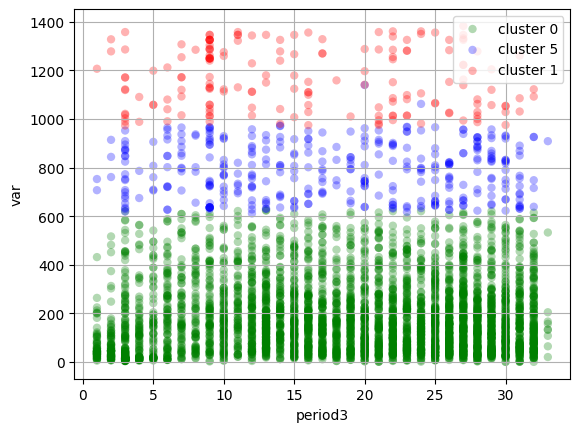

## **3. DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise

In [ ]:
pairwise.PAIRWISE_DISTANCE_FUNCTIONS

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

In [ ]:
dbscan = DBSCAN(eps=26, min_samples=10, metric='euclidean')  # cosine didn't work, poor choice of E & M

In [ ]:
dbscan.fit(features)

DBSCAN(eps=26, min_samples=10)

In [ ]:
df_with_dbscan = df.copy()
df_with_dbscan['dbscan'] = dbscan.labels_

In [ ]:
df_with_dbscan.dbscan.value_counts()

,count
dbscan,
0,3900
-1,754
1,282
2,23
3,18


In [ ]:
df_with_dbscan[df_with_dbscan['dbscan'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,3900.0,18.223590,9.378275,1.000000,12.000000,20.000000,26.000000,33.000000
period2,3900.0,18.601026,9.036463,1.000000,13.000000,20.000000,26.000000,33.000000
period3,3900.0,18.765385,8.965156,1.000000,12.000000,20.000000,26.000000,33.000000
adf_c,3900.0,0.124872,0.330616,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,3900.0,0.141795,0.348884,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,3900.0,0.156410,0.363290,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,3900.0,0.009744,0.098240,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,3900.0,0.010769,0.103228,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,3900.0,0.092051,0.289135,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,3900.0,0.127436,0.333503,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df_with_dbscan[df_with_dbscan['dbscan'] == -1].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,754.0,17.755968,9.173486,1.000000,10.000000,18.000000,26.000000,32.000000
period2,754.0,17.806366,8.778651,1.000000,11.000000,18.000000,26.000000,33.000000
period3,754.0,17.992042,8.927772,1.000000,10.000000,18.000000,26.000000,33.000000
adf_c,754.0,0.037135,0.189219,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,754.0,0.050398,0.218910,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,754.0,0.057029,0.232052,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,754.0,0.003979,0.062994,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,754.0,0.003979,0.062994,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,754.0,0.011936,0.108672,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,754.0,0.018568,0.135082,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df_with_dbscan[df_with_dbscan['dbscan'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,282.0,17.588652,9.186925,3.000000,10.000000,18.000000,26.000000,32.000000
period2,282.0,16.439716,9.041910,3.000000,9.000000,15.000000,24.750000,32.000000
period3,282.0,17.794326,8.727604,2.000000,10.000000,18.000000,26.000000,33.000000
adf_c,282.0,0.010638,0.102774,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,282.0,0.007092,0.084065,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,282.0,0.014184,0.118461,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,282.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pp_ct,282.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kpss_c,282.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kpss_ct,282.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


DBSCAN result is a little bit different, because one of the clusters is outliers. Again they are dispropotional and again hard to analyze in terms of strong feature differences.

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        fig, ax = plt.subplots()

        cluster0 = df_with_dbscan[df_with_dbscan['dbscan'] == 0]
        x, y = cluster0[df.columns[i]], cluster0[df.columns[j]]
        ax.scatter(x, y, c='green', label='cluster 0', alpha=0.3, edgecolors='none')

        cluster1 = df_with_dbscan[df_with_dbscan['dbscan'] == 1]
        x, y = cluster1[df.columns[i]], cluster1[df.columns[j]]
        ax.scatter(x, y, c='blue', label='cluster 1', alpha=0.3, edgecolors='none')

        clusterminus1 = df_with_dbscan[df_with_dbscan['dbscan'] == -1]
        x, y = clusterminus1[df.columns[i]], clusterminus1[df.columns[j]]
        ax.scatter(x, y, c='red', label='cluster -1 (outliers)', alpha=0.3, edgecolors='none')

        ax.legend()
        ax.grid(True)
        ax.set_ylabel(df.columns[j])
        ax.set_xlabel(df.columns[i])

        plt.show()

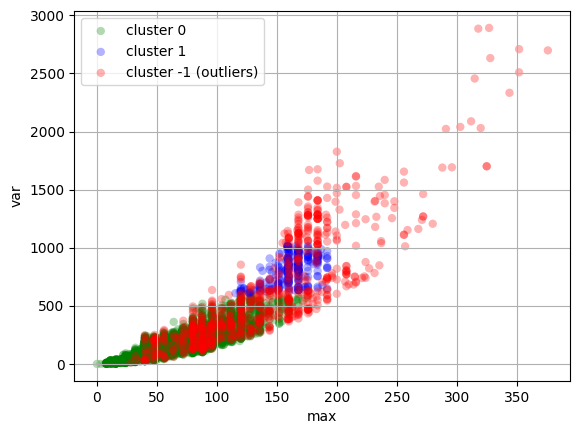

## Results

Based on different clustering algorithms applied to physical worklog features we can say that this clusterization strategy is not suitable for our task because of how hard it is to extract strong differences between metrics based on features only. We might have made our task more complicated be adding too many features (25), but still even start splits in weighted metrics analysis made more sense than those we have built in this notebook.

We will proceed with custering based on value of target and building classification models.